## Goal: Build a Linear Regression Model with Sines + Cosines

- Load the Joe Biden, Donald Trump Polls
- Build the Dataframe, as done previously
- Add sines and cosines of certain periods
- Build a regression model for each candidate!

In [1]:
from realclearpolling import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Load in the joe biden, donald trump data

df = clean_data(get_poll_data())
df.head()


,pollster,date,sample,moe,Trump (R),Biden (D),spread,Difference,Type of Voter,Sample Size,End Date,Poll Month,Year,Days Since 01-01-23
0,Economist/YouGov,3/10 - 3/12,1367 RV,3.5,44.0,42.0,Trump+2,2.0,RV,1367,2024-03-12,3,2024,436
2,Forbes/HarrisX,3/8 - 3/10,2017 RV,2.2,52.0,48.0,Trump+4,4.0,RV,2017,2024-03-10,3,2024,434
3,Morning Consult,3/8 - 3/10,6300 RV,1.0,44.0,43.0,Trump+1,1.0,RV,6300,2024-03-10,3,2024,434
4,Rasmussen Reports,3/5 - 3/7,912 LV,3.0,49.0,41.0,Trump+8,8.0,LV,912,2024-03-07,3,2024,431
5,Emerson,3/5 - 3/6,1350 RV,2.6,49.0,51.0,Biden+2,-2.0,RV,1350,2024-03-06,3,2024,430


In [3]:
# Add sines and cosines of the day of the year to the data
scale = 365
days = df["Days Since 01-01-23"]
print(len(days))
freq1 = 1
freq2 = 2
freq3 = 4
freq4 = 6

frequencies = [i*2 for i in range(1, 10)]

def add_sine_cosine(df, freq, scale):
    df['sinfreq' + str(freq)] = np.sin(freq *np.pi*days/scale)
    df['cosfreq' + str(freq)] = np.cos(freq*np.pi*days/scale)

# add_sine_cosine(df, freq1, scale)
# add_sine_cosine(df, freq2, scale)
# add_sine_cosine(df, freq3, scale)
# add_sine_cosine(df, freq4, scale)
    
for freq in frequencies:
    add_sine_cosine(df, freq, scale)

frequency_strings = ['sinfreq' + str(freq) for freq in frequencies] + ['cosfreq' + str(freq) for freq in frequencies]
frequency_strings.append("Days Since 01-01-23")


df.head()


# df['sinfreq1'] = np.sin(freq1 *np.pi*days/scale)
# df['cosfreq1'] = np.cos(freq1*np.pi*days/scale)
# df['sinfreq2'] = np.sin(freq2*np.pi*days/scale)
# df['cosfreq2'] = np.cos(freq2*np.pi*days/scale)
# df['sinfreq3'] = np.sin(freq3*np.pi*days/scale)
# df['cosfreq3'] = np.cos(freq3*np.pi*days/scale)
# df['expfreq1'] = np.exp(-days/freq1)

263


,pollster,date,sample,moe,Trump (R),Biden (D),spread,Difference,Type of Voter,Sample Size,...,sinfreq10,cosfreq10,sinfreq12,cosfreq12,sinfreq14,cosfreq14,sinfreq16,cosfreq16,sinfreq18,cosfreq18
0,Economist/YouGov,3/10 - 3/12,1367 RV,3.5,44.0,42.0,Trump+2,2.0,RV,1367,...,-0.171293,0.985220,0.867456,0.497513,0.763889,-0.645348,-0.345612,-0.938377,-0.999991,0.004304
2,Forbes/HarrisX,3/8 - 3/10,2017 RV,2.2,52.0,48.0,Trump+4,4.0,RV,2017,...,-0.337523,0.941317,0.746972,0.664855,0.895839,-0.444378,-0.077386,-0.997001,-0.953681,-0.300820
3,Morning Consult,3/8 - 3/10,6300 RV,1.0,44.0,43.0,Trump+1,1.0,RV,6300,...,-0.337523,0.941317,0.746972,0.664855,0.895839,-0.444378,-0.077386,-0.997001,-0.953681,-0.300820
4,Rasmussen Reports,3/5 - 3/7,912 LV,3.0,49.0,41.0,Trump+8,8.0,LV,912,...,-0.566702,0.823923,0.508671,0.860961,0.995105,-0.098820,0.329408,-0.944188,-0.717677,-0.696376
5,Emerson,3/5 - 3/6,1350 RV,2.6,49.0,51.0,Biden+2,-2.0,RV,1350,...,-0.635432,0.772157,0.417194,0.908818,0.999769,0.021516,0.455907,-0.890028,-0.601624,-0.798779


In [4]:
# We'll use the pollster, sine and cosine of the day of the year as features
#X = df[['sinfreq1','cosfreq1', 'sinfreq2', 'cosfreq2', 'sinfreq3', 'cosfreq3']]
X = df[frequency_strings]
Xtrain = X[df["End Date"] < "2024-01-01"]
Xtest = X[df["End Date"] > "2024-01-01"]
X = pd.get_dummies(X, drop_first=True)
jby = df["Biden (D)"]
dty = df["Trump (R)"]

jbytrain = jby[df["End Date"] < "2024-01-01"]
jbytest = jby[df["End Date"] > "2024-01-01"]
dtytrain = dty[df["End Date"] < "2024-01-01"]
dtytest = dty[df["End Date"] > "2024-01-01"]
# Fit the model
jbmodel = LinearRegression()
jbmodel.fit(X, jby)
jbpredictions = jbmodel.predict(X) 


dtmodel = LinearRegression()
dtmodel.fit(X, dty)
dtpredictions = dtmodel.predict(X)

print(X.columns)


Index(['sinfreq2', 'sinfreq4', 'sinfreq6', 'sinfreq8', 'sinfreq10',
       'sinfreq12', 'sinfreq14', 'sinfreq16', 'sinfreq18', 'cosfreq2',
       'cosfreq4', 'cosfreq6', 'cosfreq8', 'cosfreq10', 'cosfreq12',
       'cosfreq14', 'cosfreq16', 'cosfreq18', 'Days Since 01-01-23'],
      dtype='object')


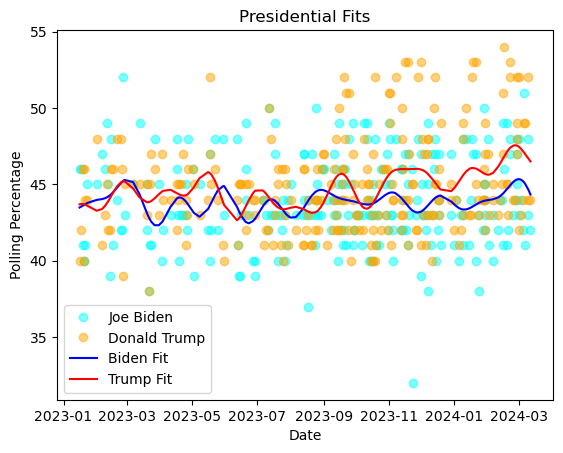

In [5]:
#Is it possible to subset the predictions to only include the unique dates?
dates = df["End Date"]
unique_dates = np.unique(dates)
unique_jbpredictions = []
unique_dtpredictions = []
for date in unique_dates:
    unique_jbpredictions.append(jbpredictions[dates == date].mean())
    unique_dtpredictions.append(dtpredictions[dates == date].mean())
plt.plot(dates, jby, 'o', label='Joe Biden', alpha = 0.5, color = 'aqua')
plt.plot(dates, dty, 'o', label='Donald Trump', alpha = 0.5, color = 'orange')
plt.plot(unique_dates, unique_jbpredictions, label='Biden Fit', color = 'blue')
plt.plot(unique_dates, unique_dtpredictions, label='Trump Fit', color = 'red')
plt.xlabel('Date')
plt.ylabel('Polling Percentage')
plt.title('Presidential Fits')
plt.legend()
plt.show()

# Craft a Prediction Dataset 

- Prediction on everyday from 2023-01-01 to Today 
- Choose one poll company (Economist/YouGov)

- We will probably see less wiggles when including the poll

In [6]:
#Create the training df
print(frequency_strings)
frequency_strings.append("pollster")
X = df[frequency_strings]
X = pd.get_dummies(X, drop_first=True)
train_df = X.copy()
poll_company = "pollster_YouGov/Economist"

#Fit the model
            
train_df


['sinfreq2', 'sinfreq4', 'sinfreq6', 'sinfreq8', 'sinfreq10', 'sinfreq12', 'sinfreq14', 'sinfreq16', 'sinfreq18', 'cosfreq2', 'cosfreq4', 'cosfreq6', 'cosfreq8', 'cosfreq10', 'cosfreq12', 'cosfreq14', 'cosfreq16', 'cosfreq18', 'Days Since 01-01-23']


,sinfreq2,sinfreq4,sinfreq6,sinfreq8,sinfreq10,sinfreq12,sinfreq14,sinfreq16,sinfreq18,cosfreq2,...,pollster_Rasmussen Reports,pollster_Reuters/Ipsos,pollster_SurveyUSA,pollster_Susquehanna,pollster_The Messenger/HarrisX,pollster_Trafalgar Group (R),pollster_USA Today/Suffolk,pollster_Wall Street Journal,pollster_Yahoo News,pollster_Yahoo News**
0,0.939856,0.642055,-0.501242,-0.984474,-0.171293,0.867456,0.763889,-0.345612,-0.999991,0.341571,...,False,False,False,False,False,False,False,False,False,False
2,0.927542,0.693281,-0.409356,-0.999250,-0.337523,0.746972,0.895839,-0.077386,-0.953681,0.373720,...,False,False,False,False,False,False,False,False,False,False
3,0.927542,0.693281,-0.409356,-0.999250,-0.337523,0.746972,0.895839,-0.077386,-0.953681,0.373720,...,False,False,False,False,False,False,False,False,False,False
4,0.907014,0.763889,-0.263665,-0.985948,-0.566702,0.508671,0.995105,0.329408,-0.717677,0.421101,...,True,False,False,False,False,False,False,False,False,False
5,0.899631,0.785650,-0.213521,-0.972118,-0.635432,0.417194,0.999769,0.455907,-0.601624,0.436651,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-0.899631,-0.785650,0.213521,0.972118,0.635432,-0.417194,-0.999769,-0.455907,0.601624,0.436651,...,False,False,False,False,False,False,False,False,False,False
263,-0.965740,-0.501242,0.705584,0.867456,-0.255353,-0.999991,-0.263665,0.863142,0.711657,0.259512,...,False,False,False,False,False,False,False,False,False,False
264,-0.985948,0.329408,0.875892,-0.622047,-0.668064,0.845249,0.385663,-0.974100,-0.060213,-0.167052,...,True,False,False,False,False,False,False,False,False,False
265,-0.863142,0.871706,-0.017213,-0.854322,0.880012,-0.034422,-0.845249,0.888057,-0.051620,-0.504961,...,False,False,False,False,False,False,False,False,False,False


In [7]:
train_df.columns

pollsters = [col for col in train_df.columns if 'pollster' in col]
print(pollsters)

['pollster_CBS News', 'pollster_CNN', 'pollster_Daily Kos/Civiqs', 'pollster_Data for Progress (D)**', 'pollster_Economist/YouGov', 'pollster_Emerson', 'pollster_FOX News', 'pollster_Federalist/Susquehanna', 'pollster_Forbes/HarrisX', 'pollster_Grinnell/Selzer', 'pollster_HarrisX**', 'pollster_Harvard-Harris', 'pollster_I&I/TIPP', 'pollster_Insider Advantage', 'pollster_InsiderAdvantage', 'pollster_Marist', 'pollster_Marquette', 'pollster_Morning Consult', 'pollster_NBC News', 'pollster_NPR/PBS/Marist', 'pollster_NY Times/Siena', 'pollster_New York Post', 'pollster_PPP (D)', 'pollster_Politico/Morning Consult', 'pollster_Quinnipiac', 'pollster_Rasmussen Reports', 'pollster_Reuters/Ipsos', 'pollster_SurveyUSA', 'pollster_Susquehanna', 'pollster_The Messenger/HarrisX', 'pollster_Trafalgar Group (R)', 'pollster_USA Today/Suffolk', 'pollster_Wall Street Journal', 'pollster_Yahoo News', 'pollster_Yahoo News**']


In [8]:
jbmodel = LinearRegression()
jbmodel.fit(train_df, jby)


dtmodel = LinearRegression()
dtmodel.fit(train_df, dty)


LinearRegression()

In [15]:
#MAKE
#Make an empty df to store the predictions

def craft_prediction_df(poll_company = "pollster_NY Times/Siena",frequencies = [i*2 for i in range(1, 10)]):
    prediction_df = pd.DataFrame()

    days = list(range(1,430))
    prediction_df["Days Since 01-01-23"] = days 

    for freq in frequencies:
        sine_name = 'sinfreq' + str(freq)
        cos_name = 'cosfreq' + str(freq)
        prediction_df[sine_name] = np.sin(freq *np.pi* prediction_df["Days Since 01-01-23"]/scale)
        prediction_df[cos_name] = np.cos(freq*np.pi* prediction_df["Days Since 01-01-23"]/scale)

    for pollster in pollsters:
        prediction_df[pollster] = False 
    
    prediction_df[poll_company] = True
    prediction_df = prediction_df[X.columns]
    return prediction_df

prediction_df = craft_prediction_df()
prediction_df


,sinfreq2,sinfreq4,sinfreq6,sinfreq8,sinfreq10,sinfreq12,sinfreq14,sinfreq16,sinfreq18,cosfreq2,...,pollster_Rasmussen Reports,pollster_Reuters/Ipsos,pollster_SurveyUSA,pollster_Susquehanna,pollster_The Messenger/HarrisX,pollster_Trafalgar Group (R),pollster_USA Today/Suffolk,pollster_Wall Street Journal,pollster_Yahoo News,pollster_Yahoo News**
0,0.017213,0.034422,0.051620,0.068802,0.085965,0.103102,0.120208,0.137279,0.154309,0.999852,...,False,False,False,False,False,False,False,False,False,False
1,0.034422,0.068802,0.103102,0.137279,0.171293,0.205104,0.238673,0.271958,0.304921,0.999407,...,False,False,False,False,False,False,False,False,False,False
2,0.051620,0.103102,0.154309,0.205104,0.255353,0.304921,0.353676,0.401488,0.448229,0.998667,...,False,False,False,False,False,False,False,False,False,False
3,0.068802,0.137279,0.205104,0.271958,0.337523,0.401488,0.463550,0.523416,0.580800,0.997630,...,False,False,False,False,False,False,False,False,False,False
4,0.085965,0.171293,0.255353,0.337523,0.417194,0.493776,0.566702,0.635432,0.699458,0.996298,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.858764,0.880012,0.043022,-0.835925,-0.899631,-0.085965,0.811539,0.917584,0.128748,0.512371,...,False,False,False,False,False,False,False,False,False,False
425,0.867456,0.863142,-0.008607,-0.871706,-0.858764,0.017213,0.875892,0.854322,-0.025818,0.497513,...,False,False,False,False,False,False,False,False,False,False
426,0.875892,0.845249,-0.060213,-0.903356,-0.811539,0.120208,0.927542,0.774884,-0.179767,0.482508,...,False,False,False,False,False,False,False,False,False,False
427,0.884068,0.826354,-0.111659,-0.930724,-0.758306,0.221922,0.965740,0.680773,-0.329408,0.467359,...,False,False,False,False,False,False,False,False,False,False


In [10]:
jbpredictions = jbmodel.predict(prediction_df)
dtpredictions = dtmodel.predict(prediction_df)

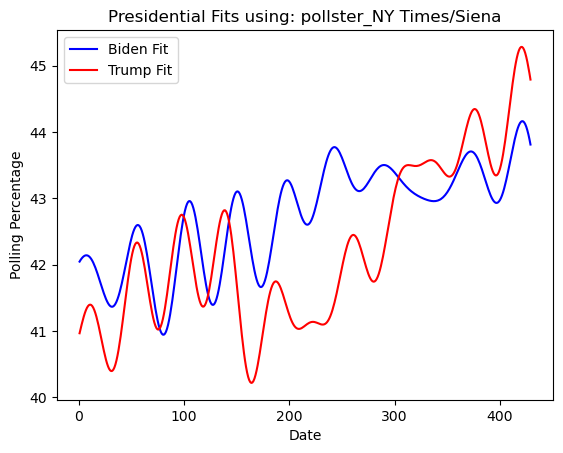

In [16]:
def plot_predictions(jbpredictions, dtpredictions, prediction_df,poll_company = "pollster_NY Times/Siena"):
    dates = prediction_df["Days Since 01-01-23"]
    unique_dates = np.unique(dates)
    unique_jbpredictions = []
    unique_dtpredictions = []
    for date in unique_dates:
        unique_jbpredictions.append(jbpredictions[dates == date].mean())
        unique_dtpredictions.append(dtpredictions[dates == date].mean())
    plt.plot(dates, jbpredictions, label='Biden Fit', color = 'blue')
    plt.plot(dates, dtpredictions, label='Trump Fit', color = 'red')
    plt.xlabel('Date')
    plt.ylabel('Polling Percentage')
    plt.title('Presidential Fits using: ' + poll_company)
    plt.legend()
    plt.show()

plot_predictions(jbpredictions, dtpredictions, prediction_df)


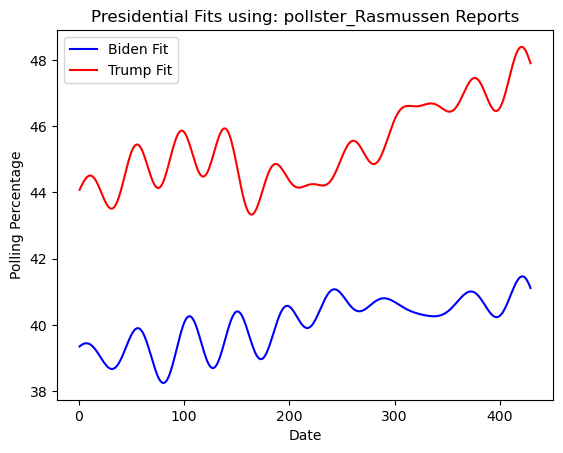

In [12]:
# Do the same for RASMUSSEN

prediction_df = craft_prediction_df(poll_company = "pollster_Rasmussen Reports")
jbpredictions = jbmodel.predict(prediction_df)
dtpredictions = dtmodel.predict(prediction_df)
plot_predictions(jbpredictions, dtpredictions, prediction_df, poll_company = "pollster_Rasmussen Reports")

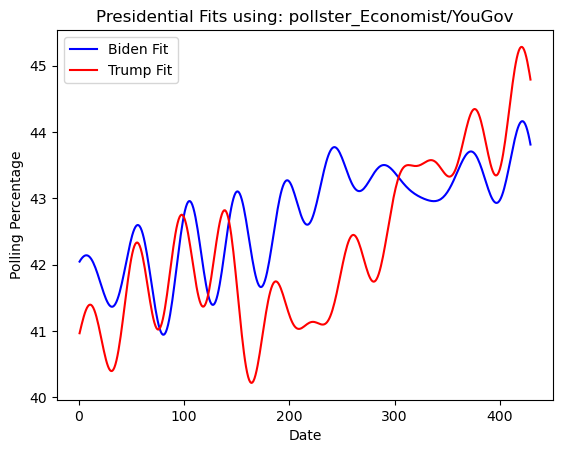

In [13]:
#Choose a "median" pollster like YouGov
poll_company = "pollster_Economist/YouGov"
prediction_df = craft_prediction_df(poll_company)
jbpredictions = jbmodel.predict(prediction_df)
dtpredictions = dtmodel.predict(prediction_df)
plot_predictions(jbpredictions, dtpredictions, prediction_df, poll_company = poll_company)

In [14]:
#Is there any sort of interesting data aggregation we can do?


$(X^TX+D)^{-1} X^Ty$